In [2]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
airbnb=pd.read_csv('kmeans_data.csv')
airbnb.head()
airbnb.describe()
airbnb.columns.values

array(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'hos1_identity_verified',
       'host_response_rate', 'instant_bookable', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'rare_True', 'rare_medium_True', 'amenities_freq',
       'more_amenities'], dtype=object)

In [4]:
airbnb['price']=exp(airbnb['log_price'])
airbnb.drop(columns=['id','rare_medium_True','log_price'],inplace=True)


In [5]:
airbnb.drop(columns='zipcode',inplace=True)
airbnb.head()

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,hos1_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,rare_True,amenities_freq,more_amenities,price
0,7,1,1,1,0,100,1,40.766115,-73.989040,6,93,3,3,0,7,0,169.017118
1,5,1,1,1,1,100,1,40.808110,-73.943756,10,92,1,3,0,11,0,145.474382
2,2,1,1,1,1,100,0,40.723883,-73.983880,82,93,1,1,0,8,0,100.484150
3,8,1,1,1,0,100,1,40.643773,-73.950855,5,72,3,3,0,13,0,99.484316
4,2,2,1,1,1,100,0,40.656278,-73.922645,57,89,1,1,0,7,0,40.044847


In [6]:
#airbnb_NYC=airbnb_NYC.dropna()
#cluster_df=airbnb_NYC[['log_price','accommodates','bathrooms','latitude','longitude','bedrooms','beds']]
#cluster_df['log_price']=exp(cluster_df['log_price'])
#cluster_df.describe()

Text(0,0.5,'Sum of distances of points to closest cluster centers')

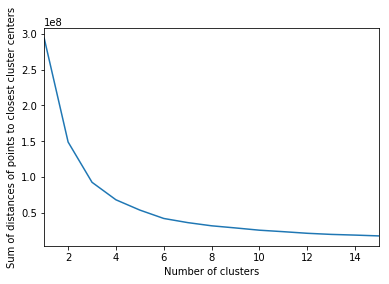

In [9]:
from sklearn.cluster import KMeans
sum_of_distances = {}
for num_clusters in range(1,16):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(airbnb)
    sum_of_distances[num_clusters] = kmeans.inertia_
Series(sum_of_distances).sort_index().plot()
xlabel('Number of clusters')
ylabel('Sum of distances of points to closest cluster centers')

In [10]:
#from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=1)
model.fit(airbnb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [ ]:
print model.cluster_centers_

In [11]:
airbnb['cluster']=model.labels_
airbnb['cluster'].value_counts()

0    11012
3     5412
1     1251
2      181
Name: cluster, dtype: int64

In [ ]:
import numpy as np
airbnb.head()
airbnb.groupby('cluster')[['price','accommodates','amenities_freq']].agg(['max','min'])

Listing key inferences:
Cluster 0: This is the biggest cluster with an average rent of 79.3USD, accommodates an average of 2 people and has about 10 amenities
Cluster 1: This cluster has an average rent of 382USD, accommodates an average of 6 people and has about 12 amenities
Cluster 2: This has an average rent of 883USD, accommodates an average of 8 people and has about 14 amenities
Cluster 3: This is the biggest cluster with an average rent of 186USD, accommodates an average of 3 people and has about 11 amenities



In [12]:
airbnb.to_csv(r'AirBnB_Clusters.csv')